In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import re
# from autocorrect import spell
#import regex as re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D

ModuleNotFoundError: No module named 'keras'

In [2]:
data = pd.read_csv('1429_1.csv')
data.head()


len(data)

C:\Users\SatyaSPY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


34660

In [6]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()
  


,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [7]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [8]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [10]:
actualrating = mpermanent
actualrating.shape

(34620, 4)

In [11]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()

len(y)

34620

In [12]:
X = x['reviews.text']
print(X)

print(len(X))

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
                               ...                        
34615    This is not appreciably faster than any other ...
34616    Amazon should include this charger with the Ki...
34617    Love my Kindle Fire but I am really disappoint...
34618    I was surprised to find it did not come with a...
34619    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 34620, dtype: object
34620


In [18]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [22]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [23]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
#next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
#this should return a vector array
bow_transformer=CountVectorizer(analyzer=text_process).fit(X)
len(bow_transformer.vocabulary_)

22151

In [25]:
review_24 = X[24]
print(review_24)
bow_25 = bow_transformer.transform([review_24])
bow_25

print(bow_25)

Great size, easy to carry for traveling. Need to spend more time Looking into apps for contact manegement, interactive calenders and most important, music storage and use.
  (0, 2682)	1
  (0, 3450)	1
  (0, 3805)	1
  (0, 6725)	1
  (0, 7928)	1
  (0, 8039)	1
  (0, 8795)	1
  (0, 10158)	1
  (0, 12856)	1
  (0, 13158)	1
  (0, 14360)	1
  (0, 14987)	1
  (0, 18713)	1
  (0, 19135)	1
  (0, 19388)	1
  (0, 20359)	1
  (0, 20635)	1
  (0, 21099)	1


In [26]:
X = bow_transformer.transform(X)

#X = X.reshape(X.shape[1:])
#X = X.transpose()

<1x22151 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [115]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 50% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [116]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
clf_logReg = LogisticRegression()
clf_logReg.fit(X_train, y_train)

predictedLogReg = clf_logReg.predict(X_test)
np.mean(predictedLogReg == y_test)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6971114962449452

In [119]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree = DecisionTreeClassifier()

clf_decisionTree.fit(X_train, y_train)

predictedDecisionTree = clf_decisionTree.predict(X_test)
np.mean(predictedDecisionTree == y_test)

0.6246678220681687

In [120]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_randomForest = RandomForestClassifier()
clf_randomForest.fit(X_train, y_train)

predictedRandomForest = clf_randomForest.predict(X_test)
np.mean(predictedRandomForest == y_test)

0.7041016753321779

In [121]:
#Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [122]:
preds = nb.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_test,y_test)

[[    1     0     2   110    98]
 [    2     0     2   106    97]
 [    0     1     8   369   347]
 [    1    10     9  1041  3170]
 [    6    28    22   696 11184]]


              precision    recall  f1-score   support

         1.0       0.10      0.00      0.01       211
         2.0       0.00      0.00      0.00       207
         3.0       0.19      0.01      0.02       725
         4.0       0.45      0.25      0.32      4231
         5.0       0.75      0.94      0.83     11936

    accuracy                           0.71     17310
   macro avg       0.30      0.24      0.24     17310
weighted avg       0.64      0.71      0.65     17310



0.7067590987868284

In [124]:
#support vector machine

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
predsvm = clf.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_test,y_test)

[[    1     0     2   110    98]
 [    2     0     2   106    97]
 [    0     1     8   369   347]
 [    1    10     9  1041  3170]
 [    6    28    22   696 11184]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       211
         2.0       1.00      0.00      0.01       207
         3.0       0.56      0.01      0.01       725
         4.0       0.53      0.07      0.13      4231
         5.0       0.71      0.99      0.83     11936

    accuracy                           0.70     17310
   macro avg       0.56      0.22      0.20     17310
weighted avg       0.65      0.70      0.60     17310



/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7016175621028308

In [ ]:
#KNeighbours Classifier

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

predsknn=neigh.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_test,y_test)

[[    1     6     8    25   171]
 [    1     5     6    30   165]
 [    6     8    33   115   563]
 [    6    13   103   586  3523]
 [   18    17   156  1157 10588]]


              precision    recall  f1-score   support

         1.0       0.03      0.00      0.01       211
         2.0       0.10      0.02      0.04       207
         3.0       0.11      0.05      0.06       725
         4.0       0.31      0.14      0.19      4231
         5.0       0.71      0.89      0.79     11936

    accuracy                           0.65     17310
   macro avg       0.25      0.22      0.22     17310
weighted avg       0.57      0.65      0.59     17310



In [25]:
matrix = []
matrix.append(predsknn)
matrix.append(predsvm)
matrix.append(preds)
matrix.append(predictedRandomForest)
matrix.append(predictedDecisionTree)
matrix.append(predictedLogReg)

y_pred = []

for i in range(0,len(matrix[0])):
    hash_map = np.zeros(6)
    for j in range(0,len(matrix)):
        t = matrix[j][i]
        t = int(t)
        hash_map[t] = hash_map[t] +1
        
    print(hash_map)
    rating = 0
    predicted_value = 0
    for k in range(1,6):
        if(rating < hash_map[k]):
            rating = hash_map[k]
            predicted_value = k
    y_pred.append(predicted_value)
    
y_pred

[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 6. 0.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 2. 3.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 6. 0.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 1. 0. 0. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 2. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]


[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 1. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 1. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 2. 1. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 4. 0. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 2. 4.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 1. 0. 0. 3. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 4. 0. 1. 1.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]


[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 1. 0. 1. 4.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 1. 0. 2. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 1. 0. 0. 0. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 0. 6.]
[0. 1. 0. 0. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 1. 0. 0. 1. 4.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 1. 0. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 6. 0.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 1. 0. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 5. 0.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 2. 3.]
[0. 1. 0. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 1. 0. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 6. 0.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 2. 2. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 1. 0. 0. 2. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 1. 0. 2. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 1. 0. 2. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 1. 0. 1. 1. 3.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 2. 3.]


[0. 0. 1. 0. 1. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 4. 1.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 2. 0. 4.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]


[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 1. 0. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 3. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 2. 0. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 2. 4. 0.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 1. 0. 0. 5.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 1. 4. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 2. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 1. 0. 4. 1.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 1. 0. 0. 3. 2.]
[0. 0. 0. 0. 1. 5.]
[0. 1. 0. 0. 1. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 5. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]


[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 2. 2. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 1. 4. 1.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 4. 2.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 1. 0. 0. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 3. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 0. 6.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 1. 2. 3.]
[0. 0. 0. 0. 1. 5.]
[0. 0. 0. 0. 2. 4.]
[0. 0. 0. 0. 2. 4.]


[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [26]:
np.mean(y_pred == y_test)

0.7119584055459273

In [27]:
positive_review = actualrating['reviews.text'][2]
positive_review

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [28]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]


4.0

In [29]:
positive_review = actualrating['reviews.text'][11]
positive_review


'Excellent product. Easy to use, large screen makes watching movies and reading easier.'

In [30]:
positive_review_transformed = bow_transformer.transform([positive_review])
neigh.predict(positive_review_transformed)[0]

5.0

In [31]:
negative_review = mpermanent['reviews.text'][34650]
print(negative_review)

negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

negative_review = mpermanent['reviews.text'][34656]
print(negative_review)

Although the description states that this will work on my Kindle Fire HDX 8.9, when I plug the charger to the Kindle, I receive a message that the charger is not of sufficient wattage to properly charge the Kindle. I bought this charger as a back up for when I travel. The original charger which came with the Kindle does not show this warning when I plug it in.
Amazon should include this charger with the Kindle. The fact that they're charging us extra for something that should be included is a sign of cheapness. Plus, you can use any micro-USB phone charger instead of this to charge your Kindle. Save your money.


In [32]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

5.0

In [33]:
mpermanent['label'] = ['1' if star >= 3 else '0' for star in mpermanent['reviews.rating']];
mpermanent

/home/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reviews.rating,reviews.text,reviews.title,reviews.username,label
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,1
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,1
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,1
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,1
...,...,...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0


In [34]:
mpermanent.tail()

,reviews.rating,reviews.text,reviews.title,reviews.username,label
34655,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,1
34656,1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,0
34657,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,0
34658,1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,0
34659,1.0,to spite the fact that i have nothing but good...,as with everyone else,sandi,0


In [35]:
import re
reviews = mpermanent['reviews.text']
labels = mpermanent['label']

print(len(reviews))
print(len(labels))




stop = set(stopwords.words('english'))


def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

34620
34620


In [36]:
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

print(sentences[7])



print(reviews[7])

gave christmas gift inlaws husband uncle loved easy use fantastic features
I gave this as a Christmas gift to my inlaws, husband and uncle. They loved it and how easy they are to use with fantastic features!


In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [49]:
from keras.preprocessing.sequence import pad_sequences
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
text_sequences = pad_sequences(text_sequences)
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

In [50]:
print(text_sequences)

[[   0    0    0 ...  212  166  308]
 [   0    0    0 ...    9   41   24]
 [   0    0    0 ...  321 1587  201]
 ...
 [   0    0    0 ...  150   16  252]
 [   0    0    0 ...  350   37    6]
 [   0    0    0 ... 1294   32   10]]


In [51]:
print(sequence_dict)

{'great': 1, 'tablet': 2, 'use': 3, 'love': 4, 'easy': 5, 'amazon': 6, 'kindle': 7, 'good': 8, 'bought': 9, 'one': 10, 'fire': 11, 'price': 12, 'like': 13, 'product': 14, 'would': 15, 'works': 16, 'get': 17, 'echo': 18, 'much': 19, 'music': 20, 'read': 21, 'alexa': 22, 'kids': 23, 'loves': 24, 'apps': 25, 'well': 26, 'books': 27, 'reading': 28, 'device': 29, 'best': 30, 'really': 31, 'buy': 32, 'games': 33, 'time': 34, 'old': 35, 'screen': 36, 'purchased': 37, 'also': 38, 'play': 39, 'got': 40, 'gift': 41, 'better': 42, 'recommend': 43, 'set': 44, 'year': 45, 'perfect': 46, 'nice': 47, 'new': 48, 'home': 49, 'little': 50, 'light': 51, 'even': 52, 'quality': 53, 'purchase': 54, 'using': 55, 'prime': 56, 'need': 57, 'lot': 58, 'christmas': 59, 'battery': 60, 'size': 61, 'able': 62, 'movies': 63, 'want': 64, 'first': 65, 'everything': 66, 'happy': 67, 'many': 68, 'son': 69, 'work': 70, 'sound': 71, 'still': 72, 'daughter': 73, 'things': 74, 'used': 75, 'app': 76, 'fun': 77, 'reader': 78, 

In [52]:
print(word_dict)

{1: 'great', 2: 'tablet', 3: 'use', 4: 'love', 5: 'easy', 6: 'amazon', 7: 'kindle', 8: 'good', 9: 'bought', 10: 'one', 11: 'fire', 12: 'price', 13: 'like', 14: 'product', 15: 'would', 16: 'works', 17: 'get', 18: 'echo', 19: 'much', 20: 'music', 21: 'read', 22: 'alexa', 23: 'kids', 24: 'loves', 25: 'apps', 26: 'well', 27: 'books', 28: 'reading', 29: 'device', 30: 'best', 31: 'really', 32: 'buy', 33: 'games', 34: 'time', 35: 'old', 36: 'screen', 37: 'purchased', 38: 'also', 39: 'play', 40: 'got', 41: 'gift', 42: 'better', 43: 'recommend', 44: 'set', 45: 'year', 46: 'perfect', 47: 'nice', 48: 'new', 49: 'home', 50: 'little', 51: 'light', 52: 'even', 53: 'quality', 54: 'purchase', 55: 'using', 56: 'prime', 57: 'need', 58: 'lot', 59: 'christmas', 60: 'battery', 61: 'size', 62: 'able', 63: 'movies', 64: 'want', 65: 'first', 66: 'everything', 67: 'happy', 68: 'many', 69: 'son', 70: 'work', 71: 'sound', 72: 'still', 73: 'daughter', 74: 'things', 75: 'used', 76: 'app', 77: 'fun', 78: 'reader', 

In [59]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);
    
reviews_encoded

[[14, 82, 431, 203, 4, 3, 13, 298, 1357, 129, 212, 166, 308],
 [1, 666, 1779, 472, 9, 41, 24],
 [361, 2, 3, 321, 848, 1944, 994, 321, 1587, 201],
 [11,
  125,
  452,
  4,
  2,
  1,
  176,
  56,
  636,
  2,
  3173,
  4,
  62,
  215,
  133,
  56,
  212,
  26,
  63,
  124,
  79,
  7258,
  36,
  31,
  47,
  273,
  47,
  756,
  406,
  7259,
  1706,
  83,
  1309,
  4328,
  1204,
  306,
  922,
  11,
  5684,
  84,
  757,
  7260,
  2723,
  670,
  5685,
  331,
  117,
  31,
  108,
  281,
  13,
  4329,
  539,
  322],
 [9,
  583,
  73,
  329,
  1707,
  44,
  145,
  4330,
  538,
  587,
  6,
  121,
  181,
  4877,
  1378,
  212,
  1142,
  538,
  142,
  24,
  501,
  38,
  9,
  635,
  5686,
  200,
  447,
  50,
  2,
  526,
  233,
  12,
  154,
  2,
  30,
  10,
  470,
  1272,
  869,
  593,
  299,
  1161,
  329,
  1481,
  85,
  66,
  380,
  185,
  57,
  1559,
  253],
 [6,
  11,
  762,
  2,
  46,
  61,
  37,
  261,
  453,
  36,
  127,
  803,
  10,
  157,
  461,
  792,
  15,
  8,
  54],
 [1, 28, 47, 51, 282, 

(array([   7.,   72.,  114.,  211.,  873., 2238., 3498., 3492., 3038.,
        2426., 2066., 1715., 1440., 1358., 1159.,  946.,  898.,  798.,
         742.,  646.,  599.,  537.,  466.,  783.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

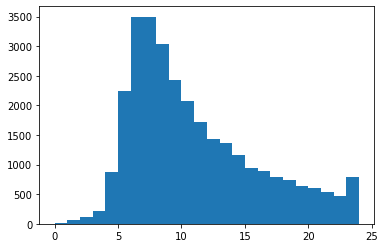

In [54]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [60]:
print(reviews_encoded[135])

[807, 6, 2, 8, 2, 12, 938, 521, 293, 153, 1709, 728, 659, 8, 395, 3, 2, 138, 547, 433, 110, 1948, 70, 1242, 15, 43, 187, 113, 253, 1536, 2]


In [61]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [62]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

X = X[random_posits];
Y = Y[random_posits];

train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu', init='uniform'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid', init='uniform'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))

/home/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmoid", kernel_initializer="uniform")`


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 8, 8)              106888    
_________________________________________________________________
lstm_5 (LSTM)                (None, 8, 150)            95400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 398,190
Trainable params: 398,190
Non-trainable params: 0
_________________________________________________________________
None
Train on 29427 samples, validate on 2769 samples
Epoch 1/5
29427/29427 [==============================] - 32s

In [48]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

2424/2424 [==============================] - 0s 175us/step
Test accuracy: 97.4835%
